Intentos de códigos para el proyecto

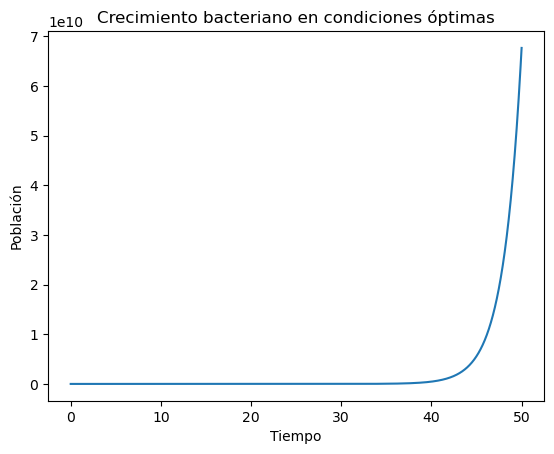

In [2]:
#Escenario 1 Crecimiento ilimitado
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
t_max = 50 # Tiempo máximo de la simulación
dt = 0.01 # Intervalo de tiempo
N0 = 1 # Población inicial
r = 0.5 # Tasa de crecimiento
K = np.inf # Capacidad de carga (infinita para condiciones óptimas)

# Simulación
N = [N0] # Lista que almacenará los datos de población
t = [0] # Lista que almacenará los datos de tiempo
for i in range(int(t_max/dt)):
    dN = r*N[i]*(1 - N[i]/K)*dt # Ecuación de crecimiento logístico
    N.append(N[i] + dN) # Añadir el nuevo valor de población a la lista
    t.append((i+1)*dt) # Añadir el nuevo valor de tiempo a la lista

# Guardar los datos de población en un archivo de texto
with open('crecimiento_bacteriano.txt', 'w') as f:
    for i in range(len(N)):
        f.write(f"{t[i]}\t{N[i]}\n")

# Graficar los resultados
plt.plot(t, N)
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Crecimiento bacteriano en condiciones óptimas')
plt.show()

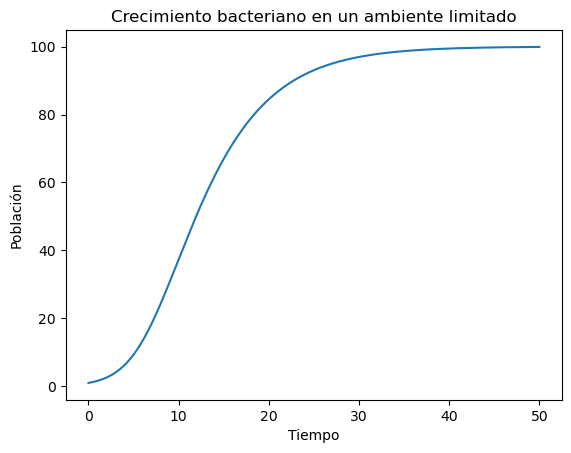

In [3]:
# Escenario 2 Crecimiento limitado
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
t_max = 50 # Tiempo máximo de la simulación
dt = 0.01 # Intervalo de tiempo
N0 = 1 # Población inicial
r = 0.5 # Tasa de crecimiento
K = 100 # Capacidad de carga del ambiente
F = 50 # Recursos disponibles (alimento y espacio)

# Simulación
N = [N0] # Lista que almacenará los datos de población
t = [0] # Lista que almacenará los datos de tiempo
for i in range(int(t_max/dt)):
    dN = r*N[i]*(1 - N[i]/K)*(F/(F + N[i]))*dt # Ecuación logística con recursos limitados
    N.append(N[i] + dN) # Añadir el nuevo valor de población a la lista
    t.append((i+1)*dt) # Añadir el nuevo valor de tiempo a la lista

# Guardar los datos de población en un archivo de texto
with open('crecimiento_bacteriano_limitado.txt', 'w') as f:
    for i in range(len(N)):
        f.write(f"{t[i]}\t{N[i]}\n")

# Graficar los resultados
plt.plot(t, N)
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Crecimiento bacteriano en un ambiente limitado')
plt.show()

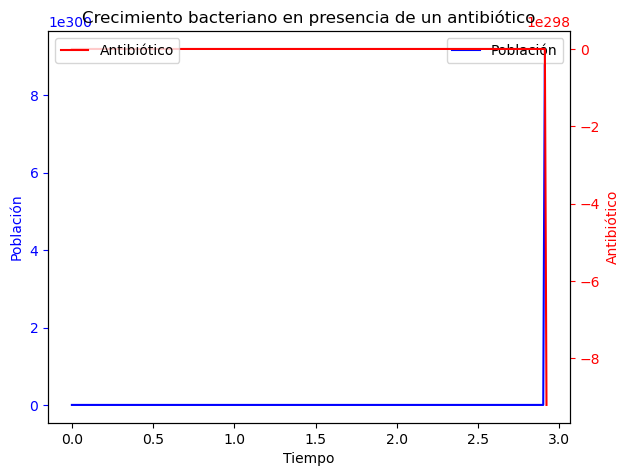

In [6]:
#Escenario 3 Crecimiento contra antibiótico
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
t_max = 10 # Tiempo máximo de la simulación
dt = 0.01 # Intervalo de tiempo
N0 = 1 # Población inicial
r = 0.5 # Tasa de crecimiento
k = 1 # Tasa de eliminación del antibiótico
I = 0.5 # Concentración inicial de antibiótico

# Simulación
N = [N0] # Lista que almacenará los datos de población
t = [0] # Lista que almacenará los datos de tiempo
I_list = [I] # Lista que almacenará los datos de concentración de antibiótico
for i in range(int(t_max/dt)):
    dN = r*N[i]*(1 - I/k)*dt # Ecuación diferencial con efecto del antibiótico
    N.append(N[i] + dN) # Añadir el nuevo valor de población a la lista
    t.append((i+1)*dt) # Añadir el nuevo valor de tiempo a la lista
    I = I - k*N[i]*dt # Actualizar la concentración de antibiótico
    I_list.append(I) # Añadir el nuevo valor de concentración a la lista

# Guardar los datos de población y concentración de antibiótico en un archivo de texto
with open('crecimiento_bacteriano_antibiotico.txt', 'w') as f:
    for i in range(len(N)):
        f.write(f"{t[i]}\t{N[i]}\t{I_list[i]}\n")

# Graficar los resultados
fig, ax1 = plt.subplots()

ax1.plot(t, N, 'b-', label='Población')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Población', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(loc=1)

ax2 = ax1.twinx()
ax2.plot(t, I_list, 'r-', label='Antibiótico')
ax2.set_ylabel('Antibiótico', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(loc=2)

fig.tight_layout()
plt.title('Crecimiento bacteriano en presencia de un antibiótico')
plt.show()

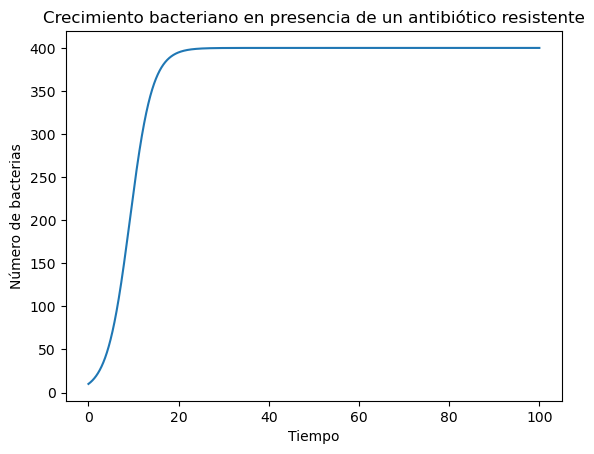

In [5]:
#Escenario 4 Crecimiento con resistencia al antibiótico
import matplotlib.pyplot as plt

# Parámetros de la simulación
N0 = 10  # Número inicial de bacterias
r = 0.5  # Tasa intrínseca de crecimiento
K = 500  # Capacidad de carga del ambiente
a = 0.1  # Tasa de eliminación por el antibiótico resistente
dt = 0.01  # Tamaño del paso de tiempo
t_max = 100  # Tiempo máximo de simulación

# Inicialización de variables
N = N0
t = 0
N_values = [N]
t_values = [t]

# Simulación
while t < t_max:
    dNdt = r * N * (1 - N / K) - a * N
    N += dNdt * dt
    t += dt
    N_values.append(N)
    t_values.append(t)

# Gráficas
plt.plot(t_values, N_values)
plt.xlabel('Tiempo')
plt.ylabel('Número de bacterias')
plt.title('Crecimiento bacteriano en presencia de un antibiótico resistente')
plt.show()

# Archivo de texto
with open('datos_crecimiento_antibiotico_resistente.txt', 'w') as f:
    f.write('Tiempo\tNúmero de bacterias\n')
    for i in range(len(t_values)):
        f.write(f'{t_values[i]}\t{N_values[i]}\n')